In [1]:
import os
import itertools
from types import SimpleNamespace
import numpy
import matplotlib.pyplot as pyplot
from scipy.interpolate import make_interp_spline
from scipy import signal
import LocalModule

In [2]:
DsetDirs, FileTags = LocalModule.lb_comparison_dict()
Results = dict()
for key in DsetDirs:
    Datasets = LocalModule.read_datasets(DsetDirs[key], FileTags[key])
    Results[key] = numpy.array([LocalModule.process_dataset(Dataset) for Dataset in Datasets])

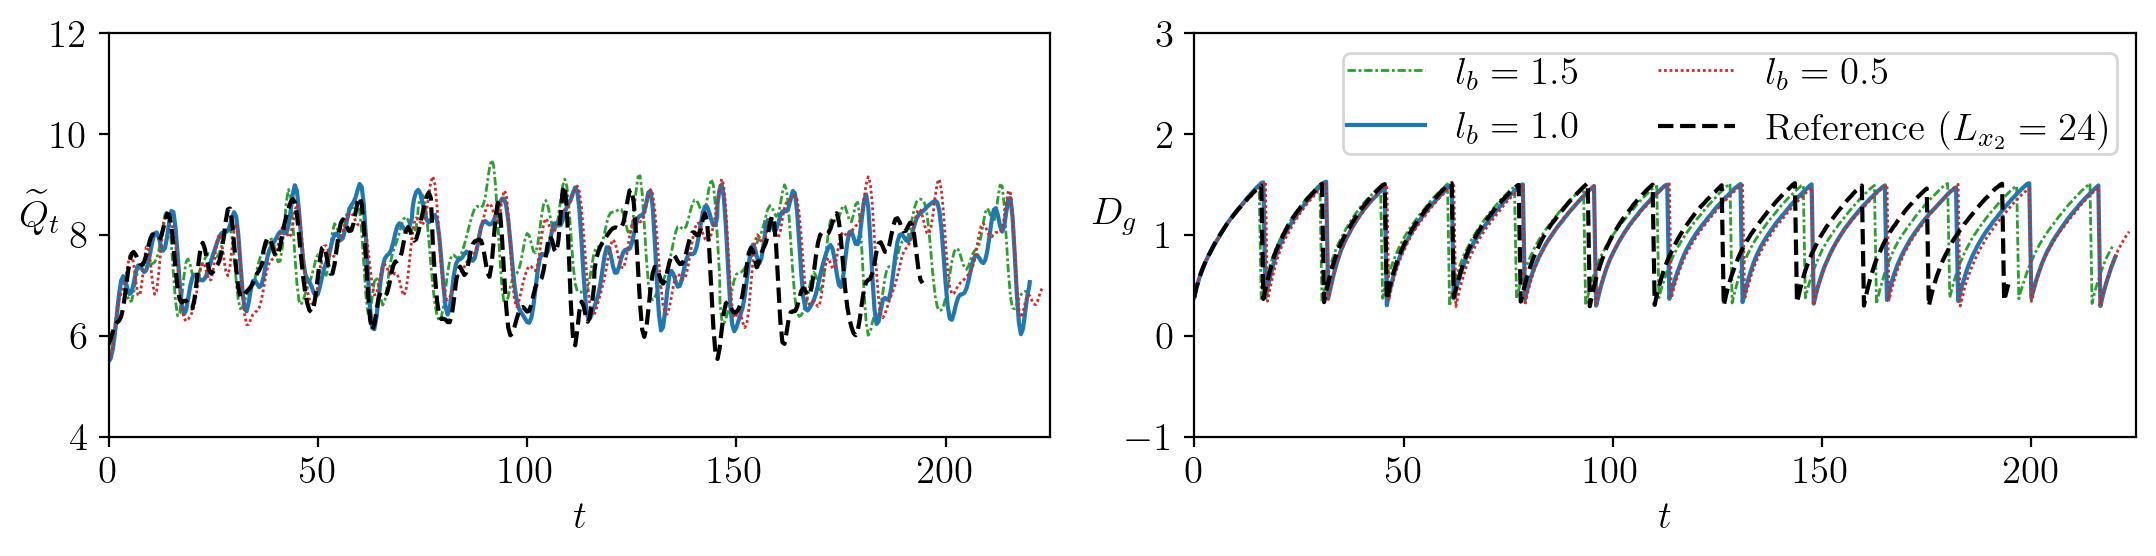

In [22]:
#b, a = signal.ellip(4, 0.1, 60, 0.1)
b, a = signal.butter(5, .3) #fs=sample_rate)

pyplot.rc("font", family="serif", size=14, weight="bold")
pyplot.rc("axes", labelweight="bold", titleweight="bold")
pyplot.rc("text", usetex=True)

QuantIndex = [1, 2]
Figure, PlotList = pyplot.subplots(1, len(QuantIndex), figsize=(11,3), dpi=200)

for Plot, Index in zip(PlotList, QuantIndex):
    
    Linestyles = itertools.cycle(("--", (0, (1, 1)), "-", (0, (3, 1, 1, 1)))[::-1])
    Colors = itertools.cycle(("black","tab:red","tab:blue","tab:green")[::-1])
    Linewidths = itertools.cycle((1.5,1.0,1.5,1.0)[::-1])
    
    for key in (list(Results.keys())[::-1]):
      
        if Index == 1:
            if key == "reference":
                Plot.plot(Results[key][:,0],
                          #signal.savgol_filter(Results[key][:,Index], 2, 1),
                          signal.filtfilt(b, a, Results[key][:,Index], method="gust"),
                          #Results[key][:,Index],
                          linewidth=next(Linewidths), linestyle=next(Linestyles), color=next(Colors))
            else:
                Plot.plot(Results[key][:,0],
                          #signal.savgol_filter(Results[key][:,Index], 2, 1),
                          signal.filtfilt(b, a, Results[key][:,Index], method="gust"),
                          #Results[key][:,Index],
                          linewidth=next(Linewidths), linestyle=next(Linestyles), color=next(Colors))
        else:
            Plot.plot(Results[key][:,0],
                      Results[key][:,Index],
                      linewidth=next(Linewidths), linestyle=next(Linestyles), color=next(Colors))

    if Index == 1:
        Plot.set_ylim([4,12])
        Plot.set_ylabel(r"$\widetilde{Q}_t$", rotation=0)
    if Index == 2:
        Plot.set_ylim([-1,3])
        Plot.set_ylabel(r"$D_g$", rotation=0)
        
    Plot.set_xlim([0,225])
    Plot.set_xlabel(r"$t$")

pyplot.legend([r"Reference ($L_{x_2}=24$)",f"$l_b=0.5$",f"$l_b=1.0$",f"$l_b=1.5$"][::-1], borderpad=0.1, ncol=2)
#pyplot.legend([r"Reference ($L_{x_2}=24$)",f"withAdv",f"withoutAdv"][::-1], borderpad=0.1, ncol=2)
pyplot.tight_layout()
pyplot.savefig("/Users/Akash/Desktop/singl_bubble_1.png")
pyplot.show()